In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng

# Zadanie 
Trzej łucznicy - Patryk, Jacek i Aleksander biorą udział w konkursie strzeleckim. Pierścienie na tarczy mają wartości punktacji od 1 do 10 (10 to najwyższy wynik). Każdy uczestnik strzela 6 strzał, zdobywając punkty:

Patryk - 5, 4, 4, 3, 9, 4 

Jacek - 4, 8, 7, 5, 1, 5 

Aleksander - 9, 9, 8, 10, 4, 10 

Na podstawie powyższych wyników chcielibyśmy wiedzieć, kto jest najlepszym łucznikiem. Innymi słowy, nasza hipoteza zerowa oznacza, że środnie we wszystkich populacjach są jednakowe.

In [13]:
data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])
 

# Wykonujemy test ANOVA

In [5]:
f, p = stats.f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 5.0
P value: 0.0216837493201 



## Wniosek
Ponieważ, odrzucamy hipotezę zerową o równości średnich zastanawiamy się czy któryś ze strzelców nie radzi sobie istotnie lepiej.

# Wykonujemy analizę post hoc

In [6]:
#Then, do the multiple testing
multiComp = MultiComparison(data['Score'], data['Archer'])

Należy również zauważyć, że funkcja <tt>tukeyhsd()</tt> ma parametr alfa, którego nie określamy wyraźnie, ponieważ jesteśmy zadowoleni ze swojej wartości domyślnej ($\alpha = 0.05$).

In [15]:
print((multiComp.tukeyhsd().summary()))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 Alex   Jack  -3.3333  -6.5755 -0.0911  True 
 Alex   Pat     -3.5   -6.7422 -0.2578  True 
 Jack   Pat   -0.1667  -3.4089  3.0755 False 
---------------------------------------------


## Wniosek
Wyniki testu Tukey pokazują średnią różnicę, przedziały ufności i to, czy należy odrzucić hipotezę zerową dla każdej pary grup na danym poziomie istotności. 

W tym przypadku test sugeruje odrzucenie hipotezy o równości średnich dla par:

- Aleksander Jacek

- Aleksander Patryk

To sugeruje, że wyniki Aleksandra stanowczo różnią się od innych grup. 

In [10]:
# Calculate the p-values:
res2 = pairwise_tukeyhsd(data['Score'], data['Archer'])
df = pd.DataFrame(data)
numData = len(df)
numTreatments = len(df.Score.unique())
dof = numData - numTreatments
# Show the group names
print((multiComp.groupsunique))
# Generate a print -------------------
    


['Alex' 'Jack' 'Pat']


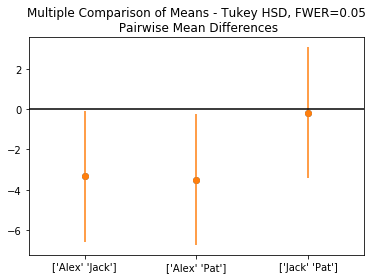

In [12]:
# Get the data
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['Score'], data['Archer'])
errors = np.ravel(np.diff(res2.confint)/2)

# Plot them
plt.plot(xvals, res2.meandiffs, 'o')
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# Put on labels
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
plt.xticks(xvals, pair_labels)

# Format the plot
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' + '\n Pairwise Mean Differences')          
plt.show()

Wizualizacja $95\%$ przedziałów ufności wzmacnia wyniki w sposób wizualny.